# BIA-652 Lab 1 Assignment. Intro to Pandas

Note: Please **DO NOT** share your answers with anyone, including uploading to Github, Course Hero, etc. 

### Your Name: 

In [32]:
import numpy as np #numerical computation
import pandas as pd #processing dataframes

Use the `RegularSeasonCompactResults` data to answer the following questions:  

In [33]:
# Download example data set
import urllib.request
from zipfile import ZipFile

urllib.request.urlretrieve("http://fengmai.net/download/data/bia652/pandas_data.zip", 
                           "pandas_data.zip")
ZipFile("pandas_data.zip").extractall()
df = pd.read_csv('data/RegularSeasonCompactResults.csv')

__Q1: Create a new column `total_score` as the sum of Wscore and Lscore.__ 

In [34]:

total_score = df["Wscore"]+df["Lscore"]
df["total_score"] = total_score
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_score
0,1985,20,1228,81,1328,64,N,0,145
1,1985,25,1106,77,1354,70,H,0,147
2,1985,25,1112,63,1223,56,H,0,119
3,1985,25,1165,70,1432,54,H,0,124
4,1985,25,1192,86,1447,74,H,0,160


__Q2: What is the min, max, average, and median of the total_score?__ 

In [135]:
df_max = df["total_score"].max()
df_min = df["total_score"].min()
df_mean = df["total_score"].mean()
df_median = df["total_score"].median()

print(f"Maximum = {df_max}")
print(f"Minimum = {df_min}")
print(f"Minimum = {df_median}")
print(f"Minimum = {df_mean}")

Maximum = 331
Minimum = 62
Minimum = 140.0
Minimum = 141.0973301488757


In [36]:
df.head()


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_score
0,1985,20,1228,81,1328,64,N,0,145
1,1985,25,1106,77,1354,70,H,0,147
2,1985,25,1112,63,1223,56,H,0,119
3,1985,25,1165,70,1432,54,H,0,124
4,1985,25,1192,86,1447,74,H,0,160


__Q3: Find the average total score for each year (season).__ 

In [8]:
year_avg = df.groupby("Season")['total_score'].mean()
df['year_avg'] = year_avg
year_avg.head()


Season
1985    138.583356
1986    138.447528
1987    144.764496
1988    147.470796
1989    151.259351
Name: total_score, dtype: float64

__Q4: Plot a time series plot of average total score by year (season)__ 

Hint: search Google for: how to plot a pandas series or [read the user guide](https://pandas.pydata.org/docs/user_guide/visualization.html)


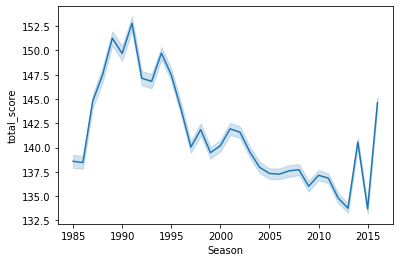

In [41]:
import seaborn as sns
df[['Season','total_score']] 
sns.lineplot(data=df, x="Season" , y="total_score")






__Q5: Which year has the highest percentage of blowout games, which is defined as a winning margin of at least 30 points?__ 



In [65]:
df.head()
margin = df['Wscore'] - df['Lscore']
df['margin'] = margin

df_margin = df[df['margin']>30].head()
df_margin.groupby('Season').count().margin.idxmax()

1985

`**Q6: For each team and season combination,   
a) find the average number of points scored by the team per game in each season;  
b) plot the average points scored by team 1461 by year.**

Hint: This requires you to consider both the case when the team won (Wscore) and when the team lost (Lscore).  
Your answer for each team-year combination should be between Wscore_when_winning and Lscore_when_losing in the last dataframe of the tutorial. 

In [68]:
df.head()


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_score,margin
0,1985,20,1228,81,1328,64,N,0,145,17
1,1985,25,1106,77,1354,70,H,0,147,7
2,1985,25,1112,63,1223,56,H,0,119,7
3,1985,25,1165,70,1432,54,H,0,124,16
4,1985,25,1192,86,1447,74,H,0,160,12


In [107]:
wdummy = df.copy()
wdummy['flag'] = True
wdummy = wdummy.groupby(by=['Season','Wteam']).flag.sum()
wscores = df.groupby(by=['Season', 'Wteam']).Wscore.sum()
wscores = wscores.reset_index()
wdummy = wdummy.reset_index()

In [106]:
ldummy = df.copy()
ldummy['flag'] = True
ldummy = ldummy.groupby(by=['Season','Lteam']).flag.sum()
lscores = df.groupby(by=['Season', 'Lteam']).Lscore.sum()
lscores = lscores.reset_index()
ldummy = ldummy.reset_index()

In [108]:
lscores

,Season,Lteam,Lscore
0,1985,1102,1159
1,1985,1103,772
2,1985,1104,541
3,1985,1106,968
4,1985,1108,444
...,...,...,...
10178,2016,1460,796
10179,2016,1461,1229
10180,2016,1462,356
10181,2016,1463,368


In [116]:
dummy = pd.merge(wdummy,ldummy,left_on=['Season','Wteam'],right_on=['Season','Lteam'])
dummy['plays'] = dummy['flag_x'] + dummy['flag_y']
dummy_scores = pd.merge(wscores,lscores,left_on=['Season','Wteam'],right_on=['Season','Lteam'])

In [119]:
dummy_finale = pd.merge(dummy,dummy_scores,left_on=['Season','Wteam','Lteam'],right_on=['Season','Wteam','Lteam'])

In [120]:
dummy_finale

,Season,Wteam,flag_x,Lteam,flag_y,plays,Wscore,Lscore
0,1985,1102,5.0,1102,19.0,24.0,355,1159
1,1985,1103,9.0,1103,14.0,23.0,632,772
2,1985,1104,21.0,1104,9.0,30.0,1514,541
3,1985,1106,10.0,1106,14.0,24.0,751,968
4,1985,1108,19.0,1108,6.0,25.0,1631,444
...,...,...,...,...,...,...,...,...
10164,2016,1460,20.0,1460,13.0,33.0,1469,796
10165,2016,1461,12.0,1461,18.0,30.0,881,1229
10166,2016,1462,27.0,1462,5.0,32.0,2247,356
10167,2016,1463,21.0,1463,6.0,27.0,1643,368


In [123]:
dummy_finale['avg'] = (dummy_finale['Lscore']*dummy_finale['flag_y'] + dummy_finale['Wscore']*dummy_finale['flag_x'])/dummy_finale['plays']

In [124]:
dummy_finale

,Season,Wteam,flag_x,Lteam,flag_y,plays,Wscore,Lscore,avg
0,1985,1102,5.0,1102,19.0,24.0,355,1159,991.500000
1,1985,1103,9.0,1103,14.0,23.0,632,772,717.217391
2,1985,1104,21.0,1104,9.0,30.0,1514,541,1222.100000
3,1985,1106,10.0,1106,14.0,24.0,751,968,877.583333
4,1985,1108,19.0,1108,6.0,25.0,1631,444,1346.120000
...,...,...,...,...,...,...,...,...,...
10164,2016,1460,20.0,1460,13.0,33.0,1469,796,1203.878788
10165,2016,1461,12.0,1461,18.0,30.0,881,1229,1089.800000
10166,2016,1462,27.0,1462,5.0,32.0,2247,356,1951.531250
10167,2016,1463,21.0,1463,6.0,27.0,1643,368,1359.666667


In [132]:
graph_data = dummy_finale[dummy_finale.Wteam == 1461]['avg'].to_list()
year_data = dummy_finale[dummy_finale.Wteam == 1461]['Season'].to_list()

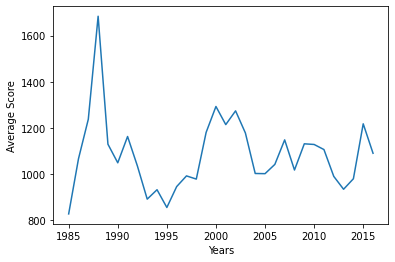

In [133]:
plt.plot(year_data, graph_data)
plt.ylabel('Average Score')
plt.xlabel('Years')
plt.show()
